In [1]:
#%pip install scikit-learn muss man nicht jedes Mal machen
#https://www.ecad.eu/dailydata/customquery.php?optionSelected=station&processtext1=Your+query+is+being+processed.+Please+wait...&blendingselect=no&countryselect=GERMANY%7Cde&stationselect=KIEL-HOLTENAU%5Bde%5D%7C3995&elementselect=All+elements%7C**&processtext2=Your+query+is+being+processed.+Please+wait...

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [3]:
file_path = r"C:\Users\phili\Desktop\Projekt_ausprobieren\Alle_Temperaturen_und_Luftfeucht_untereinander_1.csv"
df_temp_humidity = pd.read_csv(file_path, sep=";", encoding="latin1")
df_temp_humidity

,Datum,Temperatur,Luftfeuchtigkeit,Bewölkung,Niederschlag
0,01.01.1987,0.2,0.90,6.0,0.3
1,02.01.1987,-0.2,0.63,7.0,0.0
2,03.01.1987,-1.2,0.74,3.0,0.0
3,04.01.1987,-2.0,0.89,6.0,8.6
4,05.01.1987,1.4,0.89,7.0,2.2
...,...,...,...,...,...
13875,27.12.2024,4.7,0.87,6.0,0.2
13876,28.12.2024,1.0,0.91,7.0,0.0
13877,29.12.2024,3.5,0.90,7.5,0.2
13878,30.12.2024,7.5,0.89,7.0,1.5


In [4]:
#df_neu = df_neu.drop(columns=["Humidity"])
#df_neu

In [5]:
df_temp_humidity["Datum"] = pd.to_datetime(df_temp_humidity["Datum"], format="%d.%m.%Y")
df_temp_humidity

,Datum,Temperatur,Luftfeuchtigkeit,Bewölkung,Niederschlag
0,1987-01-01,0.2,0.90,6.0,0.3
1,1987-01-02,-0.2,0.63,7.0,0.0
2,1987-01-03,-1.2,0.74,3.0,0.0
3,1987-01-04,-2.0,0.89,6.0,8.6
4,1987-01-05,1.4,0.89,7.0,2.2
...,...,...,...,...,...
13875,2024-12-27,4.7,0.87,6.0,0.2
13876,2024-12-28,1.0,0.91,7.0,0.0
13877,2024-12-29,3.5,0.90,7.5,0.2
13878,2024-12-30,7.5,0.89,7.0,1.5


In [6]:
"""df_temp = df_temp_humidity.drop(columns=["Humidity"])
df_temp"""
#df_temp ist ohne humidity #nicht nötig zu droppen, da bei den features für X, entweder kombi nur temp oder temp und humidity

'df_temp = df_temp_humidity.drop(columns=["Humidity"])\ndf_temp'

In [7]:
print(f"Statistiken des Datensatzes:")
print(df_temp_humidity.describe()) #es wird nur die unterste Zeile ausgegeben
df_temp_humidity

Statistiken des Datensatzes:
                     Datum    Temperatur  Luftfeuchtigkeit     Bewölkung  \
count                13880  13880.000000      13880.000000  13880.000000   
mean   2005-12-31 12:00:00      9.473941          0.798195      5.333357   
min    1987-01-01 00:00:00    -11.900000          0.000000      0.000000   
25%    1996-07-01 18:00:00      4.600000          0.730000      4.000000   
50%    2005-12-31 12:00:00      9.400000          0.810000      6.000000   
75%    2015-07-02 06:00:00     14.600000          0.870000      7.000000   
max    2024-12-31 00:00:00     27.600000          1.000000      8.000000   
std                    NaN      6.463455          0.101742      2.175716   

       Niederschlag  
count  13880.000000  
mean       2.070706  
min        0.000000  
25%        0.000000  
50%        0.100000  
75%        2.200000  
max      104.200000  
std        4.360273  


,Datum,Temperatur,Luftfeuchtigkeit,Bewölkung,Niederschlag
0,1987-01-01,0.2,0.90,6.0,0.3
1,1987-01-02,-0.2,0.63,7.0,0.0
2,1987-01-03,-1.2,0.74,3.0,0.0
3,1987-01-04,-2.0,0.89,6.0,8.6
4,1987-01-05,1.4,0.89,7.0,2.2
...,...,...,...,...,...
13875,2024-12-27,4.7,0.87,6.0,0.2
13876,2024-12-28,1.0,0.91,7.0,0.0
13877,2024-12-29,3.5,0.90,7.5,0.2
13878,2024-12-30,7.5,0.89,7.0,1.5


In [8]:
print("\nFehlende Werte:")
df_temp_humidity.isnull().sum()


Fehlende Werte:


Datum               0
Temperatur          0
Luftfeuchtigkeit    0
Bewölkung           0
Niederschlag        0
dtype: int64

In [9]:
fehlende_werte = df_temp_humidity[df_temp_humidity.isnull().any(axis=1)] #habe ich benutzt, aber nun nicht mehr notwendig
fehlende_werte

,Datum,Temperatur,Luftfeuchtigkeit,Bewölkung,Niederschlag


In [10]:
df_temp_humidity.dtypes

Datum               datetime64[ns]
Temperatur                 float64
Luftfeuchtigkeit           float64
Bewölkung                  float64
Niederschlag               float64
dtype: object

In [11]:
#umwandeln Niederschlagstyp "object" in float: ##ist weiterhin zur Erklärung, was angepasst wurde an den Datentxpen, enthalten
df_temp_humidity["Niederschlag"] = pd.to_numeric(df_temp_humidity["Niederschlag"], errors="coerce")

In [12]:
df_temp_humidity.dtypes #für Vorher-nachher_check, da Niederschlag zunächst object war

Datum               datetime64[ns]
Temperatur                 float64
Luftfeuchtigkeit           float64
Bewölkung                  float64
Niederschlag               float64
dtype: object

In [13]:
df_temp_humidity["Jahr"] = df_temp_humidity["Datum"].dt.year
df_temp_humidity["Monat"] = df_temp_humidity["Datum"].dt.month
df_temp_humidity["Tag"] = df_temp_humidity["Datum"].dt.day
#Jahr, Monat, Tag extrahieren
df_temp_humidity["Tag_des_Jahres"] = df_temp_humidity["Datum"].dt.dayofyear

In [14]:
df_temp_humidity.dtypes

Datum               datetime64[ns]
Temperatur                 float64
Luftfeuchtigkeit           float64
Bewölkung                  float64
Niederschlag               float64
Jahr                         int32
Monat                        int32
Tag                          int32
Tag_des_Jahres               int32
dtype: object

In [15]:
fehlende_werte = df_temp_humidity[df_temp_humidity.isnull().any(axis=1)]
fehlende_werte

,Datum,Temperatur,Luftfeuchtigkeit,Bewölkung,Niederschlag,Jahr,Monat,Tag,Tag_des_Jahres


Random_Forest_Predictor

In [37]:
X = df_temp_humidity[["Temperatur"]]
##test_size = 0.2
y = df_temp_humidity["Luftfeuchtigkeit"] 
#MSE: 3.32, R^2=0.92; x war = "Datum"
#Mittlerer quadratischer Fehler (MSE): 6.00 Bestimmtheitsmaß (R²): 0.85; x war = "Jahr", "Monat", "Tag", "Luftfeuchtigkeit", "Bewölkung", "Niederschlag"
##mit allen Variablen zusammen ist das Modell schlechter; hyperparameter_tuning: jede

# 1. EDA: csv laden in den code und gucken mit describe; Datensatz sichten (fehlende Werte, outlyer, welche Spalten habe ich, verstehe ich die Spalten)
# 2. Data Cleaning:
# 3. Feature Engineering: von woanders featuers erhalten oder selber erstellen? wie z.B. Niederschlag und Wolken
# 4. Modelling: ab train_test_split mit wahl der features x und y // Wahl des machine_learning modells // laiufen lassen
##was als x_wert und was als y_wert: #MSE: 3.32, R^2=0.92; x war = "Datum" (bestes Ergebnis)
##Modell = random_forest, da lin. regression nicht gut ging; aber: geht es besser, trotz Overfitting? ausprobieren, daher feature engineer mit Humidity, NICHT vorher, nur im ML_Teil
##R^2 / random_forest: gucke Def. nach und auch lin. Regression + MSE; um wie viel weicht der Wert von der 16 ab, wenn prognose = 15; jede Zeile wird Abweichung berechnet
##r^2: Zähler (vorhersage), nenner (tatsächlich), das dann minus 1; also 16/15-1 = (wie viel Varianz ist vorhanden)
# 5. Evaluation: man sichtet modell_performance mit mse und R^2 // r^2 = 1 ist gut, weil du ja alle Vorhersagen durch alle Ergebnisse teilst und dann minus 1
##r^2 sollte etwa: 0.85>r^2<1
# 6. Fine Tuning: schaue mir feature_selection an für x; brauche ich noch die anderen features?
# 7. weiteres feature_engineering? data_cleaning? anderes Modell


#y = df_temp_humidity["Temperatur"] #y ist immer Ziel!!! y ist immer fest, mit x spielst du herum
#was ich voraussagen will, in y
#notiere Ergebnisse für x zu y (y immer gleich)
##->theoretisch mit verschiedenen test_sizes?!

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
#model = LinearRegression()->nicht sinnvoll, da Daten nicht komplett linear
model=RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
#mache mal mit chat GPT n_esti und random erhöhen oder verringern, da du nur eine Spalte hast
#was kann ich hier noch für hyper_para nutzen und was bedeuten die und Auswirkungen auf Projekt
##nur zusätzl. Para
#dein code ist schon super, nicht mehr viel herumspielen, außer, du hast Zeit und Bock

RandomForestRegressor(random_state=42)

In [40]:
y_pred = model.predict(X_test)
y_pred
#gibt Array der predictions zurück, nur die Ergebnisse, da nur Gesamtzahl des Outputs vom x_test_datensatz
##gibt Ergebnisse der y pred aus
#für jeden x_wert kommt ein y raus
#ist array, damit wir das unten auswerten zu können

array([0.76511922, 0.73656601, 0.83179142, ..., 0.79398899, 0.83101866,
       0.74020201])

In [41]:
mse = mean_squared_error(y_test, y_pred)
#ergebnisse wie sie sind aus 0,2 test
#zuverlässigste Accuracy ist R^2
#hier nur R^2 und mse (mse niedrig, r^2 möglichst bei 1 (wie viel weicht model ab)); bloß nicht negativ
r2 = r2_score(y_test, y_pred)

In [42]:
print("\nModellbewertung:")
print(f"Mittlerer quadratischer Fehler (MSE): {mse:.2f}")
print(f"Bestimmtheitsmaß (R²): {r2:.2f}")


Modellbewertung:
Mittlerer quadratischer Fehler (MSE): 0.01
Bestimmtheitsmaß (R²): 0.17


In [22]:
#mse möglichst niedrig; Kombi Monat und Jahr bei x, dann MSE 38,82, R^2 = 0,05
#notiere Daten wenn Luftfeuchtigkeit dazu
#lin. Regression wohl nicht das beste Model, nur wenn die DAten linear sind
#nimm' Luftfeuchtigkeit dazu, dann, weil non_linear, x_g_boost
#time series forecast: nur nach date_value (nur ganzes Datum und Wert), auto. Jahrestrend mit berechnet (SARIMA-Model)
##random_forest_regressor: R^2 bei 0,75, MSE bei 10,08; wäre fertig
###Model ist gut für eine Wettervorhersage
#LUFTFEUCHT mit rein
#alles mit und ohne Jahr und auch Kombi
#nur das eine Model hier, da super; nur noch Luftfeuchtigkeit hinzu
##test_datensatz (0,2 beim Split) und diese dannn auch in einer Spalte ausgeben und dann die predicteten

#durchlauf1: X = df_temp_humidity[["Jahr", "Monat", "Tag", "Humidity"]], Modellbewertung: Mittlerer quadratischer Fehler (MSE): 5.41, Bestimmtheitsmaß (R²): 0.87
#durchlauf2: X = df_temp_humidity[["Jahr", "Monat", "Tag_des_Jahres"]], Modellbewertung:Mittlerer quadratischer Fehler (MSE): 4.02 Bestimmtheitsmaß (R²): 0.90

#### Vorhersage / tatsächlicher Wert

In [23]:
#pd.set_option('display.max_rows', None)
#result_df = pd.DataFrame({"Vorhersage": y_pred, "Tatsächlicher Wert": y_test.values})
#result_df
#mache top_10->check
#ergänze den Tag, damit man den sehen kann->check
#einen mit Beispiel mit Datum und dann mal die besten predictions->check
#sortiere aufsteigensd nach diff. werte->check
#mit Datumsspalte: besten diff. werte hier und das ist an den und den Tagen->check
#diff in voller Tabelle und über wie viele sind die ergebnisse super; einmal mit und einmal ohne Datum->?
#habe es in der tabelle und dann nach Datum


In [24]:
print("Spalten im DataFrame:", df_temp_humidity.columns.tolist())

Spalten im DataFrame: ['Datum', 'Temperatur', 'Luftfeuchtigkeit', 'Bewölkung', 'Niederschlag', 'Jahr', 'Monat', 'Tag', 'Tag_des_Jahres']


In [25]:
print("Länge von df:", len(df_temp_humidity))
print("Länge von X_test:", len(X_test))
print("Länge von y_test:", len(y_test))
print("Länge von y_pred:", len(y_pred))

Länge von df: 13880
Länge von X_test: 2776
Länge von y_test: 2776
Länge von y_pred: 2776


In [26]:
# Erstellen eines neuen DataFrames mit den Vorhersagen
df_results = X_test.copy()  # Falls X_test ein DataFrame ist, sonst pd.DataFrame(X_test)
df_results['Vorhersage'] = y_pred
df_results['Tatsächlicher Wert'] = y_test

# Falls X_test keine Datumsspalte hat, holen wir das Datum aus df (indem wir den Index verwenden)
df_results['Datum'] = df_temp_humidity.loc[X_test.index, 'Datum']

# Differenz berechnen (absolute Abweichung)
df_results['Differenz'] = abs(df_results['Vorhersage'] - df_results['Tatsächlicher Wert'])

# Nach Differenz sortieren
df_results = df_results.sort_values(by='Differenz', ascending=True)

# Ergebnisse anzeigen
df_best_worst = pd.concat([df_results.head(10), df_results.tail(10)])
df_best_worst

,Datum,Vorhersage,Tatsächlicher Wert,Differenz
3210,1995-10-16,13.101,13.1,0.001
13321,2023-06-22,19.802,19.8,0.002
10610,2016-01-19,-2.798,-2.8,0.002
4533,1999-05-31,13.097,13.1,0.003
10203,2014-12-08,3.104,3.1,0.004
10654,2016-03-03,3.196,3.2,0.004
10761,2016-06-18,15.504,15.5,0.004
11667,2018-12-11,4.195,4.2,0.005
7792,2008-05-02,10.905,10.9,0.005
900,1989-06-19,19.006,19.0,0.006


In [27]:
#Klasseneinteilung in einer_Schritten!!!
# Klassen für die Differenz definieren
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
labels = [
    "0.000 - 0.999",
    "1.000 - 1.999",
    "2.000 - 2.999",
    "3.000 - 3.999",
    "4.000 - 4.999",
    "5.000 - 5.999",
    "6.000 - 6.999",
    "7.000 - 7.999",
    "8.000 - 8.999",
    "9.000 - 9.999"
]

# Falls df noch keine Spalten für Vorhersage & Tatsächlicher Wert hat, fügen wir sie ein
if "Vorhersage" not in df_results.columns or "Tatsächlicher Wert" not in df_results.columns:
    df_results["Vorhersage"] = y_pred  # Falls nötig, anpassen
    df_results["Tatsächlicher Wert"] = y_test  # Falls nötig, anpassen

# Differenz berechnen
df_results["Differenz"] = abs(df_results["Vorhersage"] - df_results["Tatsächlicher Wert"])

# Differenz in Kategorien einteilen
df_results["Differenz_Klasse"] = pd.cut(df_results["Differenz"], bins=bins, labels=labels, right=False)

# Absolute Anzahl pro Klasse berechnen
df_class_counts = df_results["Differenz_Klasse"].value_counts().sort_index().reset_index()
df_class_counts.columns = ["Differenz", "Absolute Anzahl"]

# Relative Anzahl (%) berechnen
df_class_counts["Relative Anzahl (%)"] = df_class_counts["Absolute Anzahl"] / len(df_results) * 100
df_class_counts["Relative Anzahl (%)"] = df_class_counts["Relative Anzahl (%)"].round(2)

# Ergebnis anzeigen
df_class_counts


#Benji: Konfusionsmatrix->Tabelle ist cooler; erkannt ein Blinder (Angelo)
#bei Grafik musst du das kontenisieren und it overkill; bei boolean wäre es ok

,Differenz,Absolute Anzahl,Relative Anzahl (%)
0,0.000 - 0.999,1296,46.69
1,1.000 - 1.999,807,29.07
2,2.000 - 2.999,396,14.27
3,3.000 - 3.999,173,6.23
4,4.000 - 4.999,67,2.41
5,5.000 - 5.999,25,0.90
6,6.000 - 6.999,8,0.29
7,7.000 - 7.999,3,0.11
8,8.000 - 8.999,0,0.00
9,9.000 - 9.999,1,0.04


In [28]:
##BITTE NICHT NICHT NICHT (!!!!) VERWENDEN!!!!! (Angelo)


# Klassen für die Differenz definieren
bins_1 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
labels_1 = [
    "0.000 - 0.499",
    "0.500 - 0.999",
    "1.000 - 1.499",
    "1.500 - 1.999",
    "2.000 - 2.499",
    "2.500 - 2.999",
    "3.000 - 3.499",
    "3.500 - 3.999",
    "4.000 - 4.499",
    "4.500 - 4.999",
    "5.000 - 5.499",
    "5.500 - 5.999",
    "6.000 - 6.499",
    "6.500 - 6.999",
    "7.000 - 7.499",
    "7.500 - 7.999",
    "8.000 - 8.499",
    "8.500 - 8.999",
    "9.000 - 9.499",
    "9.500 - 9.999"
]

# Falls df noch keine Spalten für Vorhersage & Tatsächlicher Wert hat, fügen wir sie ein
if "Vorhersage" not in df_results.columns or "Tatsächlicher Wert" not in df_results.columns:
    df_results["Vorhersage"] = y_pred  # Falls nötig, anpassen
    df_results["Tatsächlicher Wert"] = y_test  # Falls nötig, anpassen

# Differenz berechnen
df_results["Differenz"] = abs(df_results["Vorhersage"] - df_results["Tatsächlicher Wert"])

# Differenz in Kategorien einteilen
df_results["Differenz_Klasse"] = pd.cut(df_results["Differenz"], bins=bins_1, labels=labels_1, right=False) #linke Seite ist der Name, rechts der Inhalt

# Absolute Anzahl pro Klasse berechnen
df_class_counts_1 = df_results["Differenz_Klasse"].value_counts().sort_index().reset_index()
df_class_counts_1.columns = ["Differenz", "Absolute Anzahl"]

# Relative Anzahl (%) berechnen
df_class_counts_1["Relative Anzahl (%)"] = df_class_counts_1["Absolute Anzahl"] / len(df_results) * 100
df_class_counts_1["Relative Anzahl (%)"] = df_class_counts_1["Relative Anzahl (%)"].round(2)

# Ergebnis anzeigen
df_class_counts_1

,Differenz,Absolute Anzahl,Relative Anzahl (%)
0,0.000 - 0.499,1296,46.69
1,0.500 - 0.999,807,29.07
2,1.000 - 1.499,396,14.27
3,1.500 - 1.999,173,6.23
4,2.000 - 2.499,67,2.41
5,2.500 - 2.999,25,0.90
6,3.000 - 3.499,8,0.29
7,3.500 - 3.999,3,0.11
8,4.000 - 4.499,0,0.00
9,4.500 - 4.999,1,0.04


In [29]:
df_results.to_csv(r"C:\Users\phili\Desktop\Projekt_ausprobieren\vorhersage_vs_tatsächliche_werte_temperatur_3.csv", index=True, decimal=",")

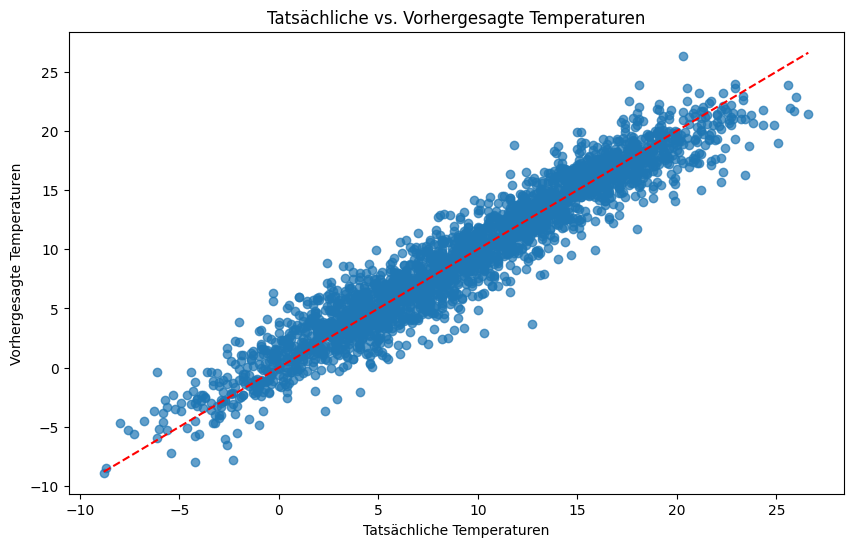

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")
plt.title("Tatsächliche vs. Vorhergesagte Temperaturen")
plt.xlabel("Tatsächliche Temperaturen")
plt.ylabel("Vorhergesagte Temperaturen")
plt.show()

In [31]:
pip install chardet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
import chardet

with open(r"C:\Users\phili\Desktop\Wetterdaten_aller_Stationen\B_(Buchstabe_#46_bis_#174\#118_Bernburg_Saale_(Nord)\TG_SOUID128364.txt", "rb") as f:
    result = chardet.detect(f.read())

print(result)  # Gibt die wahrscheinlichste Kodierung aus

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}
